<a href="https://www.kaggle.com/code/najeebz/bank-churn-binary-classification-xgboost?scriptVersionId=159106891" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# [Binary Classification with a Bank Churn Dataset](https://www.kaggle.com/competitions/playground-series-s4e1/overview)
### Playground Series - Season 4, Episode 1
_______________________________________________________________________ 
# Author Details:
- Name: Najeeb Haider Zaidi
- Email: zaidi.nh@gmail.com
- Profiles: [Github](https://github.com/snajeebz)  [LinkedIn](https://www.linkedin.com/in/najeebz) [Kaggle](https://www.kaggle.com/najeebz)
- Prepared for the submission to the competition.
________________________________________________________________________
# Attributions:


[Walter Reade, Ashley Chow. (2024). Binary Classification with a Bank Churn Dataset . Kaggle.](https://kaggle.com/competitions/playground-series-s4e1)
________________________________________________________________________
​
This Notebook is to be submitted to the competition so aims to start the process from the beginning to the creation of the submission csv file in proper format.
__________________________________________________________________________
# Code Execution and Versioning Repository: 
- [Execute the notebook in Kaggle](https://www.kaggle.com/code/najeebz/binary-classification-cnn-mlp-classifier)
- [Github Repository](https://github.com/snajeebz/playground)
​
____________________________________________________________________
# Citation:

Najeeb Zaidi. (2024). Binary Classification with a Bank Churn Dataset. Competition Submission. Kaggle. https://www.kaggle.com/code/najeebz/binary-classification-cnn-mlp-classifier

# Initiation:

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm.auto import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
from warnings import filterwarnings;
filterwarnings('ignore');

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv


# Reading the Dataset

In [2]:
df=pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')

In [3]:
test

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [4]:
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


# Exploring the Dataset

In [5]:
test.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [6]:
df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.Geography.value_counts()

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

In [8]:
df.NumOfProducts.value_counts()


NumOfProducts
2    84291
1    77374
3     2894
4      475
Name: count, dtype: int64

In [9]:
df.IsActiveMember.describe()

count    165034.000000
mean          0.497770
std           0.499997
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: IsActiveMember, dtype: float64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [11]:
def encoder(df):
    from sklearn.preprocessing import LabelEncoder
    labelencoder = LabelEncoder()
    for col in df.columns:
        if df[col].dtypes=='object':
            df[col]=labelencoder.fit_transform(df[col])
    return df

df=encoder(df)
test=encoder(test)

# Visualizations:

In [12]:
train_df=df[['Surname','CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']]
train_df
test_df=test[['Surname','CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]

## Sunburst Chart ( Understanding the Hierarchy)

In [13]:
import plotly.express as px
fig = px.sunburst(
    df,
    path=['Geography','Gender','NumOfProducts','IsActiveMember','Exited'], 
    color='Exited',color_discrete_map={'1':'gold', '0':'darkblue'},
    width=1200, height=1200
)
fig.show()

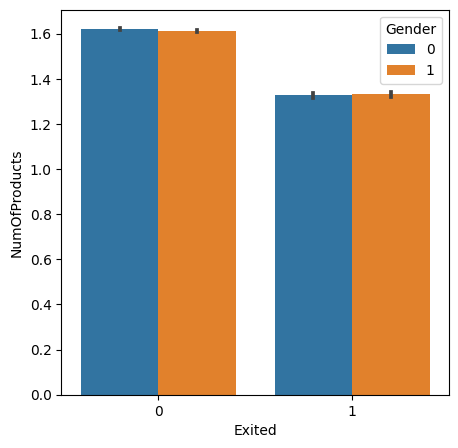

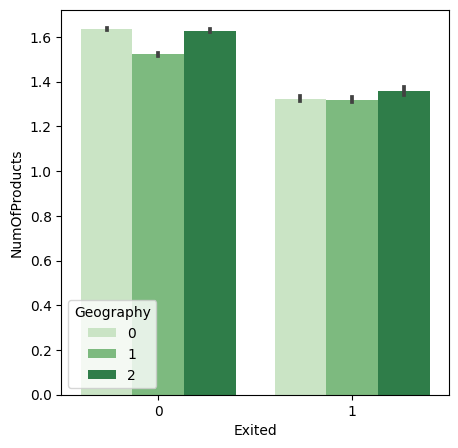

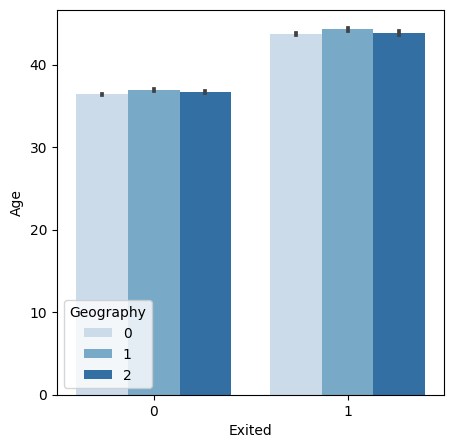

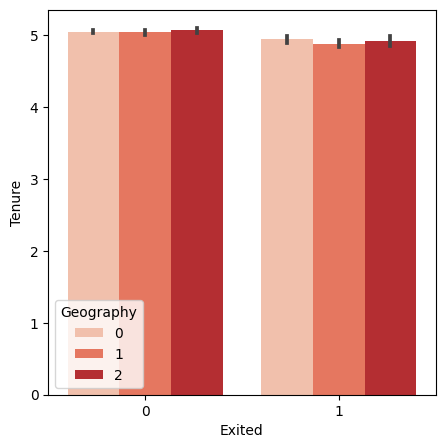

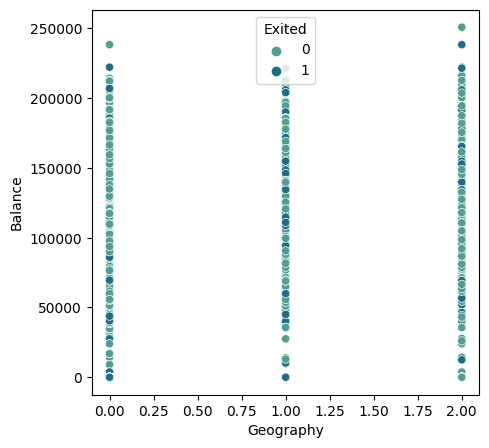

In [14]:
plt.figure(figsize=(5, 5))
s=sns.barplot(train_df,y='NumOfProducts',x='Exited',hue='Gender')
plt.figure(figsize=(5, 5))
s=sns.barplot(train_df,y='NumOfProducts',x='Exited',hue='Geography', palette='Greens')
plt.figure(figsize=(5, 5))
s=sns.barplot(train_df,y='Age',x='Exited',hue='Geography',palette='Blues')
plt.figure(figsize=(5, 5))
s=sns.barplot(train_df,y='Tenure',x='Exited',hue='Geography',palette='Reds')
plt.figure(figsize=(5, 5))
s=sns.scatterplot(train_df,y='Balance',x='Geography',hue='Exited',palette='crest')

# Data Pre Processing:

## Adding some features using Cluster Columns:

In [15]:
train_df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [16]:
def cluster(X):
    from sklearn import cluster
    agglo = cluster.KMeans(n_clusters=5,random_state=0, n_init="auto")
    agglo.fit(X)
    return ((agglo.labels_+1)/5)

X=train_df[['Age','Gender']]
train_df['Cluster-1']=(cluster(X)+1)/5  
X=train_df[['Gender', 'Age', 'Tenure']]
train_df['Cluster-2']=(cluster(X)+1)/5  
X=train_df[['Age','Tenure']]
train_df['Cluster-3']=(cluster(X)+1)/5 
X=train_df[['Gender','Tenure']]
train_df['Cluster-4']=(cluster(X)+1)/5 
X=test_df[['Age','Gender']]
test_df['Cluster-1']=(cluster(X)+1)/5  
X=test_df[['Gender', 'Age', 'Tenure']]
test_df['Cluster-2']=(cluster(X)+1)/5  
X=test_df[['Age','Tenure']]
test_df['Cluster-3']=(cluster(X)+1)/5 
X=test_df[['Gender','Tenure']]
test_df['Cluster-4']=(cluster(X)+1)/5 
test_df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Cluster-1,Cluster-2,Cluster-3,Cluster-4
0,1482,586,0,0,23.0,2,0.00,2,0.0,1.0,160976.75,0.36,0.40,0.40,0.32
1,1812,683,0,0,46.0,2,0.00,1,1.0,0.0,72549.27,0.32,0.36,0.32,0.32
2,1246,656,0,0,34.0,7,0.00,2,1.0,0.0,138882.09,0.24,0.24,0.24,0.40
3,1832,681,0,1,36.0,8,0.00,1,1.0,0.0,113931.57,0.24,0.32,0.24,0.28
4,1079,752,1,1,38.0,10,121263.62,1,1.0,0.0,139431.00,0.32,0.32,0.24,0.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,1933,570,2,1,29.0,7,116099.82,1,1.0,1.0,148087.62,0.36,0.40,0.40,0.40
110019,579,575,0,0,36.0,4,178032.53,1,1.0,1.0,42181.68,0.24,0.32,0.24,0.24
110020,410,712,0,1,31.0,2,0.00,2,1.0,0.0,16287.38,0.24,0.24,0.24,0.32
110021,2656,709,0,0,32.0,3,0.00,1,1.0,1.0,158816.58,0.24,0.24,0.24,0.32


## Evaluating the Correlations:

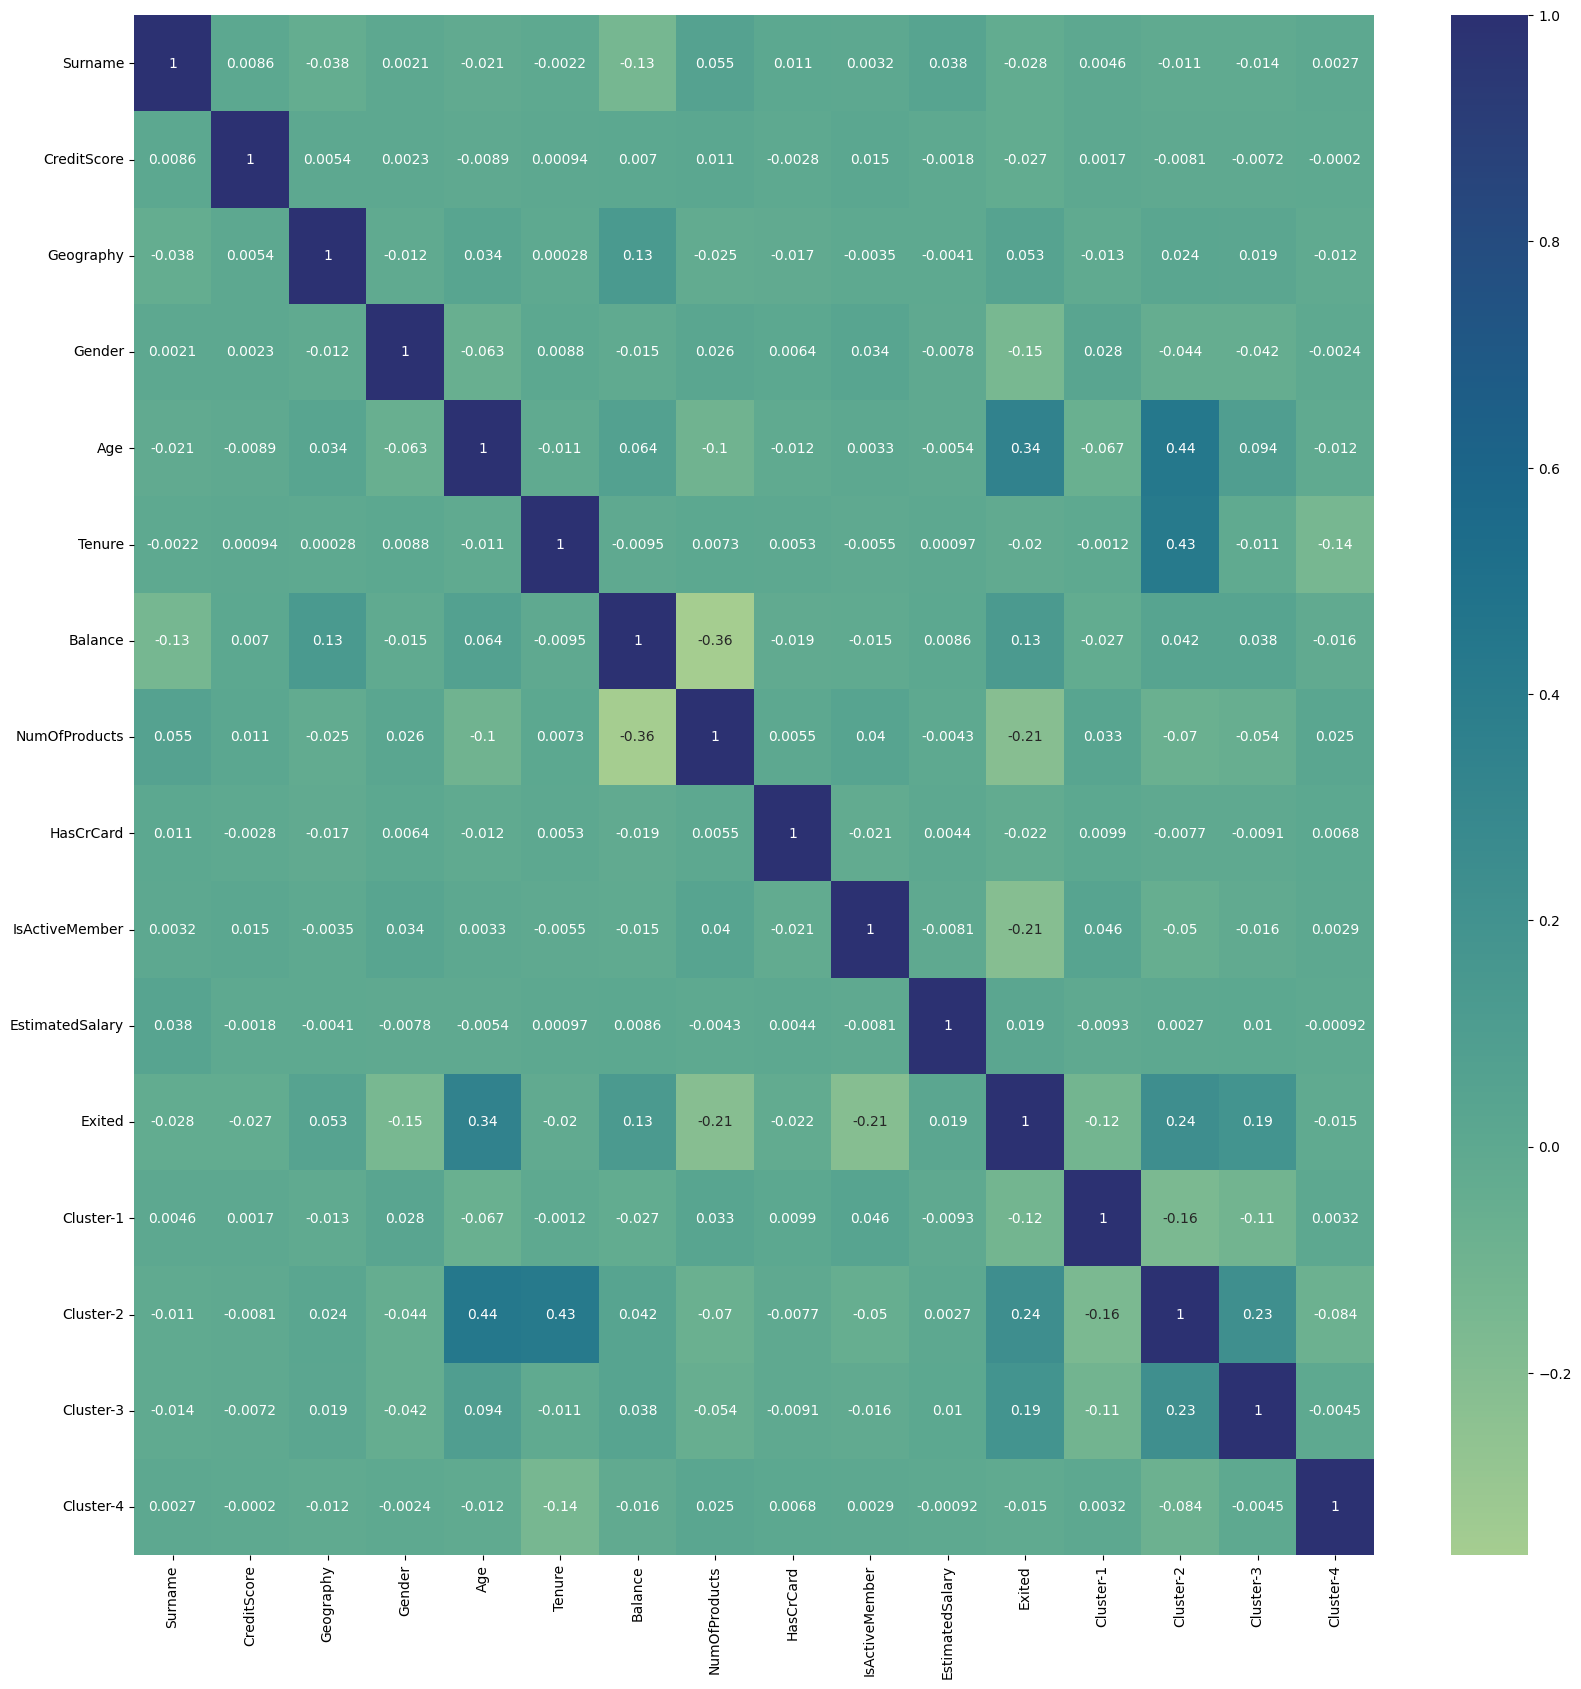

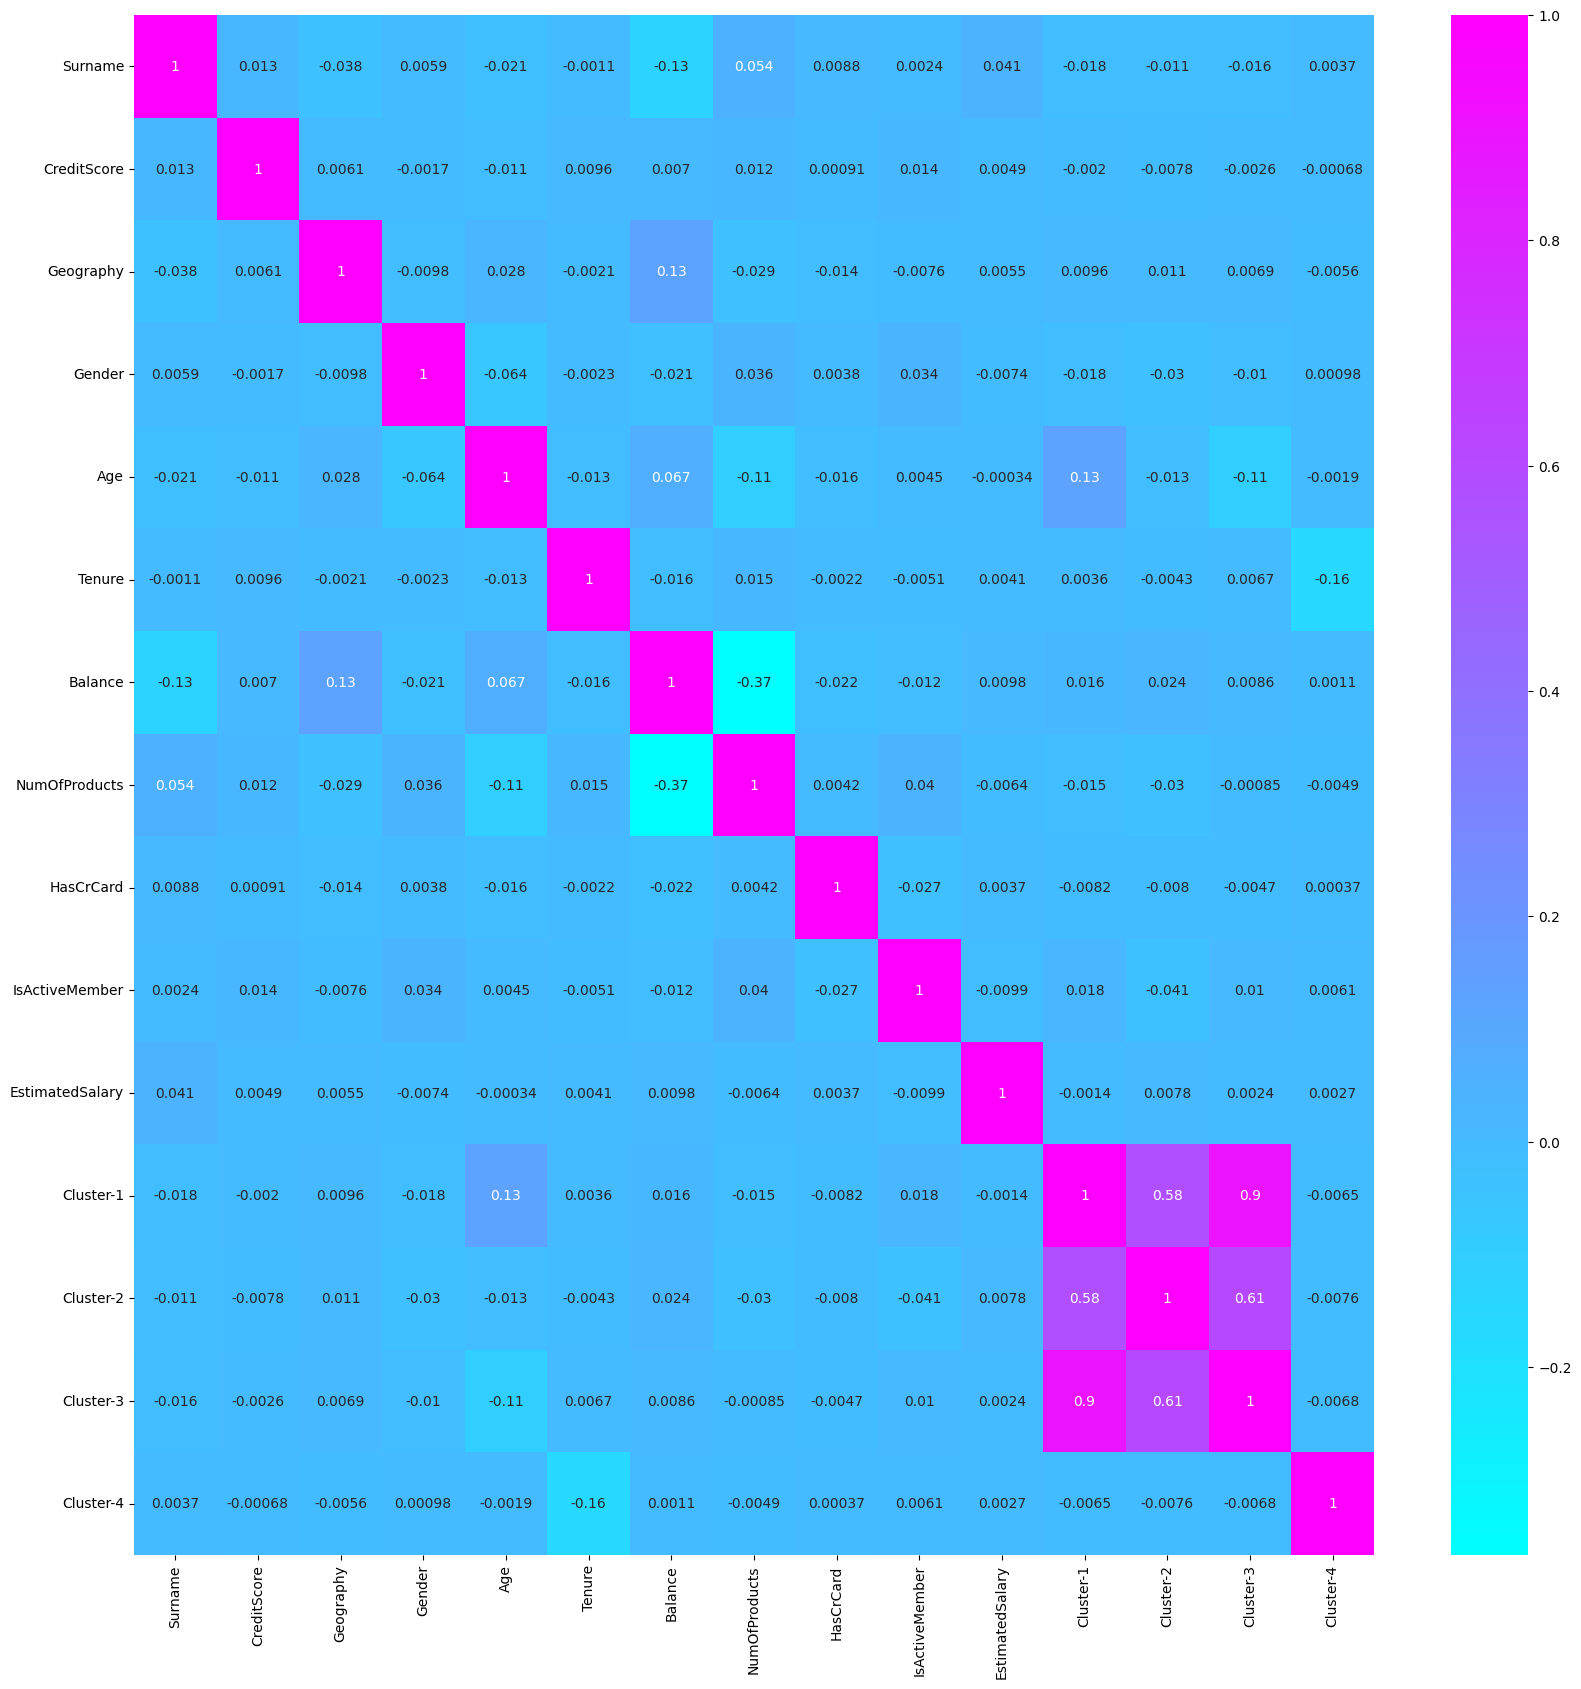

In [17]:

corr = train_df.corr()
# plot the heatmap
plt.figure(figsize=(20, 20))
s=sns.heatmap(corr,annot=True, cmap='crest')
corr = test_df.corr()
# plot the heatmap
plt.figure(figsize=(20, 20))
s=sns.heatmap(corr,annot=True, cmap='cool')

# Creating Test and Train Datasets:

In [18]:
X=train_df.drop(columns=['Exited'])
y=train_df[['Exited']].astype('int')
print(X.describe())
print(y.describe())

             Surname    CreditScore      Geography         Gender  \
count  165034.000000  165034.000000  165034.000000  165034.000000   
mean     1547.281948     656.454373       0.648545       0.564429   
std       772.771233      80.103340       0.816574       0.495833   
min         0.000000     350.000000       0.000000       0.000000   
25%       924.000000     597.000000       0.000000       0.000000   
50%      1589.000000     659.000000       0.000000       1.000000   
75%      2186.000000     710.000000       1.000000       1.000000   
max      2796.000000     850.000000       2.000000       1.000000   

                 Age         Tenure        Balance  NumOfProducts  \
count  165034.000000  165034.000000  165034.000000  165034.000000   
mean       38.125888       5.020353   55478.086689       1.554455   
std         8.867205       2.806159   62817.663278       0.547154   
min        18.000000       0.000000       0.000000       1.000000   
25%        32.000000       3.0000

## Scaling the Input

In [19]:
def scale(X):
    from sklearn import preprocessing
    scaled=preprocessing.StandardScaler()
    scaler=scaled.fit(X)
    X=scaler.transform(X)
    return X

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(scale(X),y,train_size=0.99, random_state=42)
X.keys()
test_df=scale(test_df)

# Creation, Training and Testing of Model (XGBoost Classifier)

In [21]:
def evaluate(y_test,ypred):
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix
    print("Accuracy: ",accuracy_score(y_test,y_pred)) 
    print("Precision Score : ", precision_score(y_test,y_pred)) #precision measures the proportion of true positive predictions among all positive instances. how many of survived predicted actually survived, doesn't verifies 0's 70 survived as preicted whereas actually 92 survived so 70/92 will be the precision.  if we predicted 70 survived, so presion will tell how many of those 70 predicted survived matches the actual row by row data. It checkes all positives and verifies if the answer is true for each row?
    print("Recall Score: ", recall_score(y_test,y_pred, average='macro')) #Recall measures the proportion of true positive predictions among all actual positive instalnces. If we predicted 100 survived correctly whereas actually 100 survived out of which 67 predicted correctly so recall will be 0.67
    print("F1 Score: ",f1_score(y_test,y_pred)) #mean of recall and precision
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 10))
    s=sns.heatmap(cm,annot=True, cmap='Reds')


Accuracy:  0.8715929739551787
Precision Score :  0.7873134328358209
Recall Score:  0.7660723777933703
F1 Score:  0.665615141955836


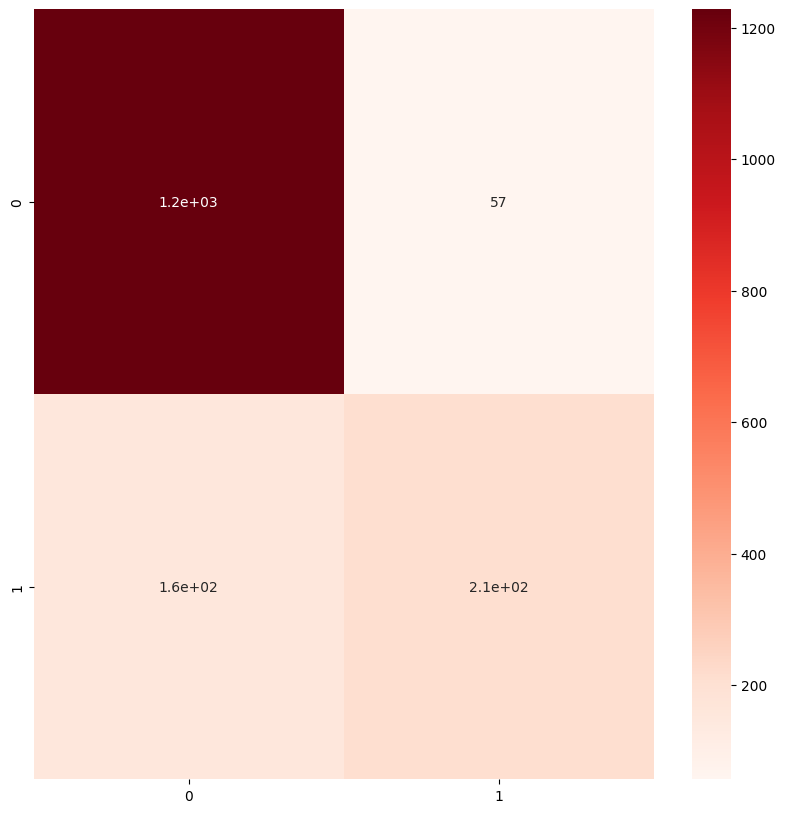

In [22]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, verbosity=2, learning_rate= 0.05, max_depth=5, n_estimators=180)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

evaluate(y_test,y_pred)

# Creating Submission File

In [23]:
y=(np.round_(xgb_model.predict_proba(scale(test_df)), decimals=1))
test['Exited']=[val[1] for val in y]
test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,165034,15773898,1482,586,0,0,23.0,2,0.00,2,0.0,1.0,160976.75,0.0
1,165035,15782418,1812,683,0,0,46.0,2,0.00,1,1.0,0.0,72549.27,0.8
2,165036,15807120,1246,656,0,0,34.0,7,0.00,2,1.0,0.0,138882.09,0.0
3,165037,15808905,1832,681,0,1,36.0,8,0.00,1,1.0,0.0,113931.57,0.3
4,165038,15607314,1079,752,1,1,38.0,10,121263.62,1,1.0,0.0,139431.00,0.4


In [24]:
test.Exited.describe()

count    110023.000000
mean          0.204458
std           0.260867
min           0.000000
25%           0.000000
50%           0.100000
75%           0.300000
max           1.000000
Name: Exited, dtype: float64

In [25]:
submission=test[['id','Exited']]
submission.to_csv('submission.csv', index=False)